In [13]:
import matplotlib.pyplot as plt
import numpy as np

# number of data
N=4000
# size of each sample
L=2
# box size
B=100

!mkdir DATA

mkdir: cannot create directory ‘DATA’: File exists


2 5 1


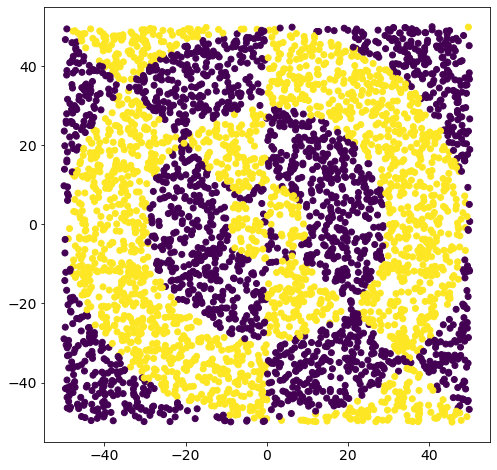

In [14]:
%run nonlinear_function.py

TYPE=2

# random seed for reproducibility
np.random.seed(12345)
print(np.random.randint(0,10),np.random.randint(0,10),np.random.randint(0,10))

x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)
        
plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show
np.savetxt(filename("data",TYPE),x)
np.savetxt(filename("labels",TYPE),y,fmt="%d")

In [15]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

import matplotlib.pyplot as plt
plt.rcParams['font.size']=14

%run nonlinear_function.py

#training data 
perc_train=0.8

2
[-31.60811883 -29.54397214] 1.0
[6.77250291 9.5544703 ] 0.0
[46.45145197 15.31770969] 1.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 0.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 1.0
[46.46475974 22.36853469] 0.0
[14.24753279 21.74536208] 0.0
data: 4000
train: 3200


<function matplotlib.pyplot.show(close=None, block=None)>

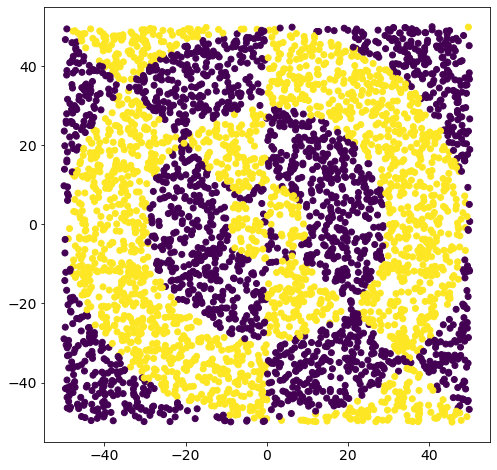

In [16]:
#keras work with numpy arrays: just use them from the start
TYPE=2
x= np.loadtxt(filename("data",TYPE), delimiter=' ')
y= np.loadtxt(filename("labels",TYPE), delimiter=' ')
N= len(x)

# dim. of a sample
L=len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])
    
N_train= int(perc_train*N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize =(8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

In [17]:
(x_train, y_train)=(x[0:N_train],y[0:N_train])
(x_valid, y_valid)=(x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


In [18]:
def Rescale(x):
    return (x-x.mean())/np.sqrt(x.var())
    #return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)
print(x_train)

[[-1.09854886 -1.02696928]
 [ 0.23239757  0.32886942]
 [ 1.60836682  0.52872451]
 ...
 [-1.71033821 -0.58010476]
 [ 0.45209286 -0.58910521]
 [ 1.55988736  0.94632066]]


In [19]:
# reproducibility
np.random.seed(12345)

CASE=1

if CASE==1:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='tanh'))
    model.add(Dense(30,activation='relu'))
    model.add(Dense(30,activation='relu'))
    model.add(Dense(30,activation='relu'))
    model.add(Dense(30,activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=500
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='sigmoid'))
    model.add(Dense(20,activation='sigmoid'))
    model.add(Dense(20,activation='sigmoid'))
    nepoch=400
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2)                 6         
                                                                 
 dense_7 (Dense)             (None, 30)                90        
                                                                 
 dense_8 (Dense)             (None, 30)                930       
                                                                 
 dense_9 (Dense)             (None, 30)                930       
                                                                 
 dense_10 (Dense)            (None, 30)                930       
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                

In [20]:
model.compile(loss='binary_crossentropy',
               #optimizer="RMSprop",
               optimizer='adam',
               metrics=['accuracy'])

In [21]:
fit = model.fit(x_train, y_train,
                epochs = nepoch, batch_size = 90,
                validation_data=(x_valid,y_valid),
                verbose=2)

Epoch 1/500
36/36 - 1s - loss: 0.6931 - accuracy: 0.5063 - val_loss: 0.6933 - val_accuracy: 0.4825 - 803ms/epoch - 22ms/step
Epoch 2/500
36/36 - 0s - loss: 0.6919 - accuracy: 0.5281 - val_loss: 0.6929 - val_accuracy: 0.4775 - 106ms/epoch - 3ms/step
Epoch 3/500
36/36 - 0s - loss: 0.6907 - accuracy: 0.5356 - val_loss: 0.6924 - val_accuracy: 0.5163 - 108ms/epoch - 3ms/step
Epoch 4/500
36/36 - 0s - loss: 0.6890 - accuracy: 0.5394 - val_loss: 0.6929 - val_accuracy: 0.4950 - 104ms/epoch - 3ms/step
Epoch 5/500
36/36 - 0s - loss: 0.6890 - accuracy: 0.5341 - val_loss: 0.6929 - val_accuracy: 0.4888 - 112ms/epoch - 3ms/step
Epoch 6/500
36/36 - 0s - loss: 0.6853 - accuracy: 0.5616 - val_loss: 0.6911 - val_accuracy: 0.4837 - 104ms/epoch - 3ms/step
Epoch 7/500
36/36 - 0s - loss: 0.6838 - accuracy: 0.5447 - val_loss: 0.6903 - val_accuracy: 0.4938 - 102ms/epoch - 3ms/step
Epoch 8/500
36/36 - 0s - loss: 0.6824 - accuracy: 0.5559 - val_loss: 0.6886 - val_accuracy: 0.5000 - 96ms/epoch - 3ms/step
Epoch 9/

Epoch 67/500
36/36 - 0s - loss: 0.3519 - accuracy: 0.8644 - val_loss: 0.3870 - val_accuracy: 0.8413 - 98ms/epoch - 3ms/step
Epoch 68/500
36/36 - 0s - loss: 0.3469 - accuracy: 0.8666 - val_loss: 0.3566 - val_accuracy: 0.8625 - 100ms/epoch - 3ms/step
Epoch 69/500
36/36 - 0s - loss: 0.3398 - accuracy: 0.8687 - val_loss: 0.3547 - val_accuracy: 0.8550 - 102ms/epoch - 3ms/step
Epoch 70/500
36/36 - 0s - loss: 0.3359 - accuracy: 0.8728 - val_loss: 0.3444 - val_accuracy: 0.8625 - 98ms/epoch - 3ms/step
Epoch 71/500
36/36 - 0s - loss: 0.3372 - accuracy: 0.8681 - val_loss: 0.3447 - val_accuracy: 0.8662 - 103ms/epoch - 3ms/step
Epoch 72/500
36/36 - 0s - loss: 0.3421 - accuracy: 0.8669 - val_loss: 0.3362 - val_accuracy: 0.8687 - 111ms/epoch - 3ms/step
Epoch 73/500
36/36 - 0s - loss: 0.3245 - accuracy: 0.8744 - val_loss: 0.3447 - val_accuracy: 0.8612 - 92ms/epoch - 3ms/step
Epoch 74/500
36/36 - 0s - loss: 0.3318 - accuracy: 0.8766 - val_loss: 0.3455 - val_accuracy: 0.8550 - 94ms/epoch - 3ms/step
Epoc

Epoch 133/500
36/36 - 0s - loss: 0.2234 - accuracy: 0.9087 - val_loss: 0.2885 - val_accuracy: 0.8875 - 133ms/epoch - 4ms/step
Epoch 134/500
36/36 - 0s - loss: 0.2277 - accuracy: 0.9131 - val_loss: 0.2870 - val_accuracy: 0.8675 - 106ms/epoch - 3ms/step
Epoch 135/500
36/36 - 0s - loss: 0.2189 - accuracy: 0.9162 - val_loss: 0.2496 - val_accuracy: 0.9137 - 123ms/epoch - 3ms/step
Epoch 136/500
36/36 - 0s - loss: 0.2151 - accuracy: 0.9144 - val_loss: 0.2569 - val_accuracy: 0.8925 - 132ms/epoch - 4ms/step
Epoch 137/500
36/36 - 0s - loss: 0.2129 - accuracy: 0.9162 - val_loss: 0.2548 - val_accuracy: 0.9050 - 137ms/epoch - 4ms/step
Epoch 138/500
36/36 - 0s - loss: 0.2280 - accuracy: 0.9116 - val_loss: 0.2383 - val_accuracy: 0.8988 - 133ms/epoch - 4ms/step
Epoch 139/500
36/36 - 0s - loss: 0.2122 - accuracy: 0.9144 - val_loss: 0.2424 - val_accuracy: 0.8950 - 105ms/epoch - 3ms/step
Epoch 140/500
36/36 - 0s - loss: 0.2118 - accuracy: 0.9191 - val_loss: 0.2567 - val_accuracy: 0.9000 - 105ms/epoch - 3

36/36 - 0s - loss: 0.1650 - accuracy: 0.9319 - val_loss: 0.2438 - val_accuracy: 0.9025 - 109ms/epoch - 3ms/step
Epoch 199/500
36/36 - 0s - loss: 0.1646 - accuracy: 0.9312 - val_loss: 0.2101 - val_accuracy: 0.9150 - 146ms/epoch - 4ms/step
Epoch 200/500
36/36 - 0s - loss: 0.1557 - accuracy: 0.9397 - val_loss: 0.2056 - val_accuracy: 0.9225 - 136ms/epoch - 4ms/step
Epoch 201/500
36/36 - 0s - loss: 0.1637 - accuracy: 0.9356 - val_loss: 0.2070 - val_accuracy: 0.9212 - 109ms/epoch - 3ms/step
Epoch 202/500
36/36 - 0s - loss: 0.1553 - accuracy: 0.9375 - val_loss: 0.2026 - val_accuracy: 0.9150 - 113ms/epoch - 3ms/step
Epoch 203/500
36/36 - 0s - loss: 0.1582 - accuracy: 0.9350 - val_loss: 0.2299 - val_accuracy: 0.9100 - 136ms/epoch - 4ms/step
Epoch 204/500
36/36 - 0s - loss: 0.1480 - accuracy: 0.9413 - val_loss: 0.2845 - val_accuracy: 0.8913 - 132ms/epoch - 4ms/step
Epoch 205/500
36/36 - 0s - loss: 0.1911 - accuracy: 0.9247 - val_loss: 0.2148 - val_accuracy: 0.9175 - 141ms/epoch - 4ms/step
Epoch 

Epoch 264/500
36/36 - 0s - loss: 0.1285 - accuracy: 0.9472 - val_loss: 0.2113 - val_accuracy: 0.9237 - 123ms/epoch - 3ms/step
Epoch 265/500
36/36 - 0s - loss: 0.1362 - accuracy: 0.9450 - val_loss: 0.2718 - val_accuracy: 0.9013 - 106ms/epoch - 3ms/step
Epoch 266/500
36/36 - 0s - loss: 0.1342 - accuracy: 0.9409 - val_loss: 0.2639 - val_accuracy: 0.9013 - 123ms/epoch - 3ms/step
Epoch 267/500
36/36 - 0s - loss: 0.1387 - accuracy: 0.9428 - val_loss: 0.2026 - val_accuracy: 0.9212 - 111ms/epoch - 3ms/step
Epoch 268/500
36/36 - 0s - loss: 0.1309 - accuracy: 0.9450 - val_loss: 0.2312 - val_accuracy: 0.9237 - 99ms/epoch - 3ms/step
Epoch 269/500
36/36 - 0s - loss: 0.1292 - accuracy: 0.9478 - val_loss: 0.2164 - val_accuracy: 0.9075 - 112ms/epoch - 3ms/step
Epoch 270/500
36/36 - 0s - loss: 0.1168 - accuracy: 0.9525 - val_loss: 0.2032 - val_accuracy: 0.9162 - 108ms/epoch - 3ms/step
Epoch 271/500
36/36 - 0s - loss: 0.1312 - accuracy: 0.9425 - val_loss: 0.1957 - val_accuracy: 0.9237 - 204ms/epoch - 6m

36/36 - 0s - loss: 0.1066 - accuracy: 0.9563 - val_loss: 0.2219 - val_accuracy: 0.9162 - 106ms/epoch - 3ms/step
Epoch 330/500
36/36 - 0s - loss: 0.1165 - accuracy: 0.9441 - val_loss: 0.2413 - val_accuracy: 0.9125 - 108ms/epoch - 3ms/step
Epoch 331/500
36/36 - 0s - loss: 0.1118 - accuracy: 0.9550 - val_loss: 0.2107 - val_accuracy: 0.9262 - 96ms/epoch - 3ms/step
Epoch 332/500
36/36 - 0s - loss: 0.1015 - accuracy: 0.9588 - val_loss: 0.2494 - val_accuracy: 0.9137 - 95ms/epoch - 3ms/step
Epoch 333/500
36/36 - 0s - loss: 0.1349 - accuracy: 0.9469 - val_loss: 0.3293 - val_accuracy: 0.8963 - 97ms/epoch - 3ms/step
Epoch 334/500
36/36 - 0s - loss: 0.1342 - accuracy: 0.9447 - val_loss: 0.2243 - val_accuracy: 0.9162 - 94ms/epoch - 3ms/step
Epoch 335/500
36/36 - 0s - loss: 0.1268 - accuracy: 0.9444 - val_loss: 0.2808 - val_accuracy: 0.9075 - 90ms/epoch - 2ms/step
Epoch 336/500
36/36 - 0s - loss: 0.1114 - accuracy: 0.9522 - val_loss: 0.2171 - val_accuracy: 0.9175 - 93ms/epoch - 3ms/step
Epoch 337/50

Epoch 395/500
36/36 - 0s - loss: 0.1056 - accuracy: 0.9519 - val_loss: 0.2325 - val_accuracy: 0.9275 - 94ms/epoch - 3ms/step
Epoch 396/500
36/36 - 0s - loss: 0.1094 - accuracy: 0.9544 - val_loss: 0.2219 - val_accuracy: 0.9262 - 90ms/epoch - 3ms/step
Epoch 397/500
36/36 - 0s - loss: 0.1042 - accuracy: 0.9569 - val_loss: 0.1958 - val_accuracy: 0.9375 - 94ms/epoch - 3ms/step
Epoch 398/500
36/36 - 0s - loss: 0.1252 - accuracy: 0.9422 - val_loss: 0.2014 - val_accuracy: 0.9375 - 92ms/epoch - 3ms/step
Epoch 399/500
36/36 - 0s - loss: 0.1194 - accuracy: 0.9478 - val_loss: 0.2153 - val_accuracy: 0.9350 - 100ms/epoch - 3ms/step
Epoch 400/500
36/36 - 0s - loss: 0.0966 - accuracy: 0.9556 - val_loss: 0.2241 - val_accuracy: 0.9312 - 132ms/epoch - 4ms/step
Epoch 401/500
36/36 - 0s - loss: 0.0998 - accuracy: 0.9566 - val_loss: 0.2035 - val_accuracy: 0.9337 - 120ms/epoch - 3ms/step
Epoch 402/500
36/36 - 0s - loss: 0.1041 - accuracy: 0.9531 - val_loss: 0.2350 - val_accuracy: 0.9250 - 103ms/epoch - 3ms/s

Epoch 461/500
36/36 - 0s - loss: 0.1001 - accuracy: 0.9553 - val_loss: 0.3127 - val_accuracy: 0.9112 - 113ms/epoch - 3ms/step
Epoch 462/500
36/36 - 0s - loss: 0.1017 - accuracy: 0.9541 - val_loss: 0.2323 - val_accuracy: 0.9287 - 112ms/epoch - 3ms/step
Epoch 463/500
36/36 - 0s - loss: 0.1064 - accuracy: 0.9525 - val_loss: 0.2447 - val_accuracy: 0.9187 - 110ms/epoch - 3ms/step
Epoch 464/500
36/36 - 0s - loss: 0.1179 - accuracy: 0.9444 - val_loss: 0.2258 - val_accuracy: 0.9275 - 106ms/epoch - 3ms/step
Epoch 465/500
36/36 - 0s - loss: 0.1044 - accuracy: 0.9563 - val_loss: 0.2621 - val_accuracy: 0.9312 - 106ms/epoch - 3ms/step
Epoch 466/500
36/36 - 0s - loss: 0.0911 - accuracy: 0.9575 - val_loss: 0.2485 - val_accuracy: 0.9212 - 105ms/epoch - 3ms/step
Epoch 467/500
36/36 - 0s - loss: 0.1379 - accuracy: 0.9475 - val_loss: 0.2363 - val_accuracy: 0.9225 - 105ms/epoch - 3ms/step
Epoch 468/500
36/36 - 0s - loss: 0.1547 - accuracy: 0.9312 - val_loss: 0.1947 - val_accuracy: 0.9212 - 112ms/epoch - 3

[0.09199800342321396, 0.22577667236328125]


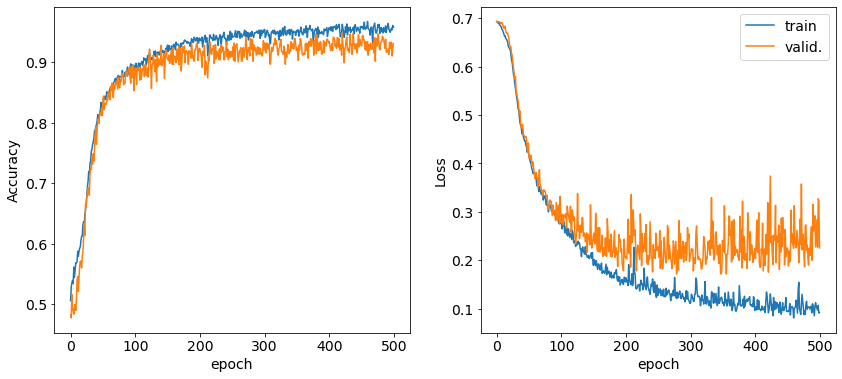

In [22]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train")
ax.plot(fit.history['val_accuracy'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax=AX[1]
ax.plot(fit.history['loss'],label="train")
ax.plot(fit.history['val_loss'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
plt.savefig('LC-2F-G-4.png')
a=[]
a.append(fit.history['loss'][-1])
a.append(fit.history['val_loss'][-1])
print(a)

In [23]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/(50/x_train[:,1].max())
pred = model.predict(grid_r)

51 2601
[50. 50.]


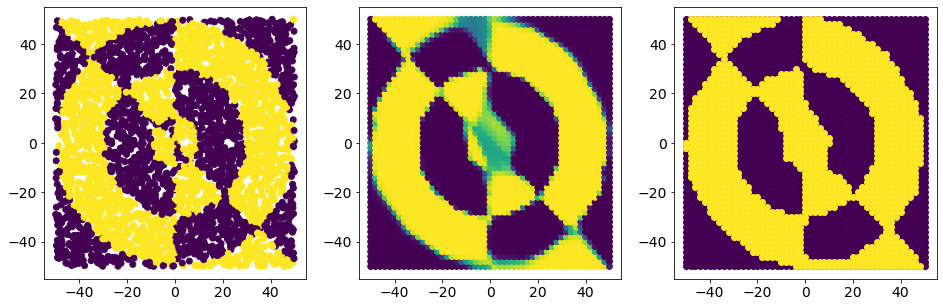

In [24]:
    
def boundaries():  
    x=np.linspace(-np.sqrt((np.pi**2)),np.sqrt((np.pi**2)),4000)
    ax.plot(x,f(x),c="r")
    ax.plot(x,-f(x),c="r")
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
#boundaries()
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
#boundaries()
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
#boundaries()
plt.show
plt.show
plt.savefig('2F-G-4.png')